# Load and Explore the Dataset
### Printing first 10 lines of dataset, and basic informations about it

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

df = pd.read_csv("/home/sofyan/Documents/tech-faq-chatbot/data/raw/software_questions.csv", encoding='latin-1')


print(df.head(10))
print(df.info())
print(df.describe(include="object"))

   Question Number                                           Question  \
0                1  What is the difference between compilation and...   
1                2               Explain the concept of polymorphism.   
2                3          Define encapsulation and give an example.   
3                4  What is an abstract class, and how is it diffe...   
4                5  Describe the principles of Object-Oriented Pro...   
5                6              What is the purpose of a constructor?   
6                7  Explain the difference between stack and heap ...   
7                8  What is a design pattern, and can you name a few?   
8                9     Define the term "DRY" in software development.   
9               10                       What is the SOLID principle?   

                                              Answer             Category  \
0  Compilation translates source code into machin...  General Programming   
1  Polymorphism allows objects of differen

### Inspect data quality

- Missing or empty questions/answers
- Duplicate rows
- Non-English or irrelevant entries <br> <br>


- **First line will print the total number of null values in each col** 
- **Second one will remove rows if the question or answer is missing, we used `inplase=True` which modifies the DataFrame directly without needing for returning new one**
- **Third line will remove the duplicate rows based on the question column, and same 2nd one we used `inplace=True`**

In [25]:
print(df.isnull().sum())
df.dropna(subset=["Question","Answer"], inplace=True)
df.drop_duplicates(subset=["Question"], inplace=True)

Question Number    0
Question           0
Answer             0
Category           0
Difficulty         0
dtype: int64


### Visualize the dataset
#### to understand the data and prepare it for NLP training

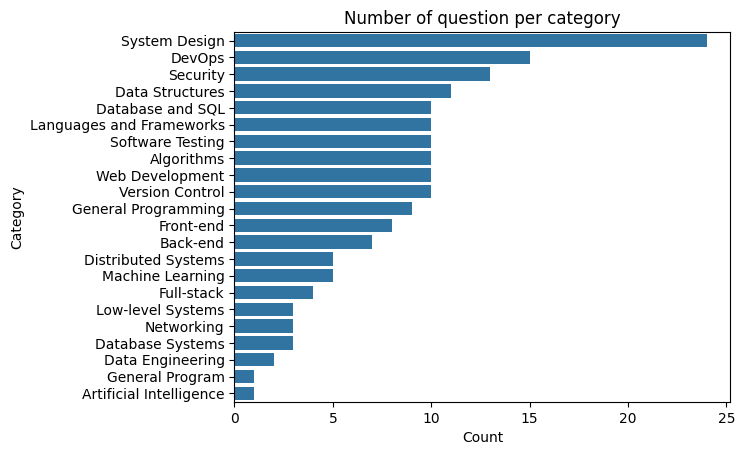

In [26]:
sns.countplot(y="Category",  data=df, order=df['Category'].value_counts().index)
plt.title("Number of question per category")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

#### Difficulty level distribution
- Helps balance dataset (e.g., if most are “Easy,” model might underperform on “Hard”).

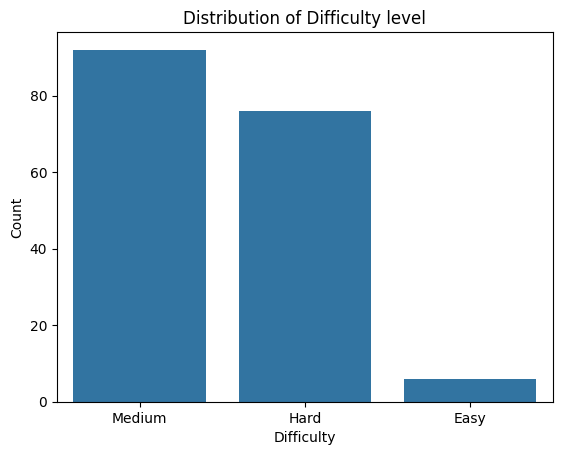

In [27]:
sns.countplot(x="Difficulty", data=df)
plt.title("Distribution of Difficulty level")
plt.xlabel("Difficulty")
plt.ylabel("Count")
plt.show()

#### Average question length per category
- This shows if certain categories have longer/more detailed questions.

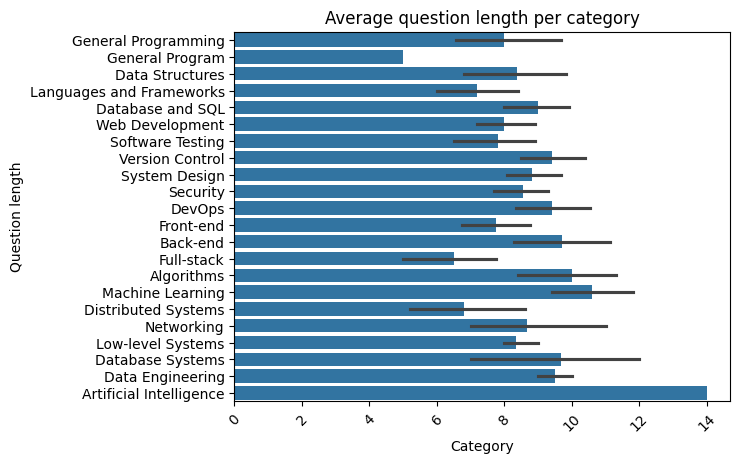

In [28]:
df["question_length"] = df["Question"].apply(lambda x: len(str(x).split()))
sns.barplot(y="Category", x="question_length", data=df, estimator='mean')
plt.title("Average question length per category")
plt.xlabel("Category")
plt.ylabel("Question length")
plt.xticks(rotation=45)
plt.show()

#### Correlation Between Difficulty and Category

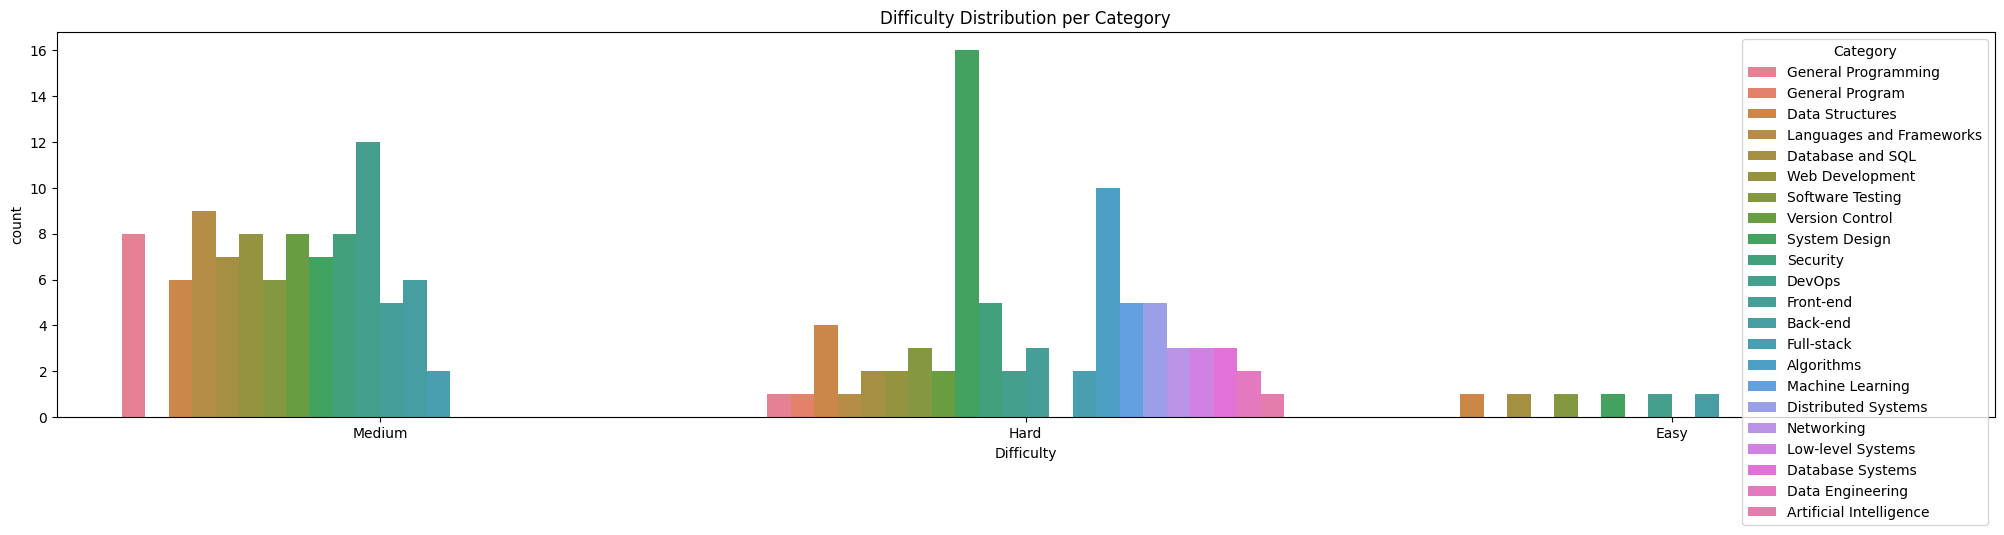

In [29]:
plt.figure(figsize=(25,5))
sns.countplot(x='Difficulty', hue='Category', data=df)
plt.title("Difficulty Distribution per Category")
plt.show()



#### Clean Questions

In [ ]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    return text.strip()

df['clean_question'] = df['Question'].apply(clean_text)

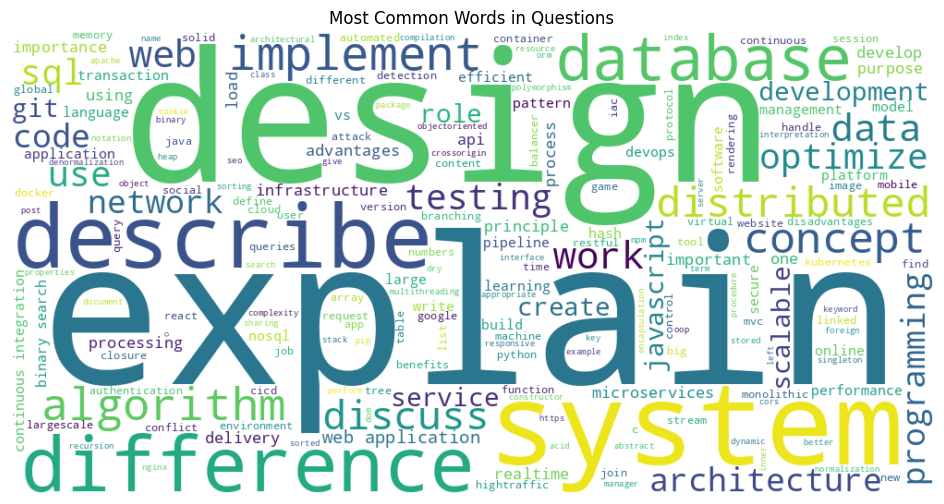

In [ ]:
from wordcloud import WordCloud

text = " ".join(df['clean_question'])
wc = WordCloud(width=1000, height=500, background_color='white').generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Questions")
plt.show()
